# Predicting Operations: S/Q, Manufacturer Rebate, Models, Delivery Time, Free Internet Shipping
* By market: S/Q, Manufacturer Rebate, and Delivery time
* All Markets: Models, Free Internet Shipping

In [1]:
#let's grab a few packages for stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Let's set some variables that we'll change each round
#Change this year to the year being predicted (i.e. if you're predicting year 16, enter '16')
predictionYear = 13 

#Load the dataset from our bsg_prices_actual - Sheet1.csv
df = pd.read_csv('bsg_operations_actual - Sheet1.csv')
df

,ID,YEAR,NA_SQ,NA_MODELS,NA_REBATE,NA_DELIVERY_TIME,NA_SHIPPING,EU_SQ,EU_MODELS,EU_REBATE,...,AP_SQ,AP_MODELS,AP_REBATE,AP_DELIVERY_TIME,AP_SHIPPING,LA_SQ,LA_MODELS,LA_REBATE,LA_DELIVERY_TIME,LA_SHIPPING
0,0,10,4.0,200,5.0,3.0,0,4.0,200,5.0,...,4.0,200,5.0,3.0,0,4.0,200,5.0,3.0,0
1,1,11,6.2,262,4.7,2.5,1,6.1,250,4.6,...,6.0,245,5.3,2.7,1,6.0,245,5.3,2.8,0
2,2,12,6.6,331,4.5,2.3,1,6.5,319,4.5,...,6.4,335,4.9,2.5,1,6.2,313,4.7,2.5,1


## Functions
1. Slope Intercept
2. Print Slope as Formula
3. Hypothetical Slope and Intercept from our data
4. Print the Predicted Year using Hypothetical Slope and Intercept

In [2]:
#1. Slope Intercept Function
#Function to find the slope intercept of a first degree polynomial
def getSlope(x,y): #pass in the x value, y value, and a string for printing
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4) #compute the slope
    return slope, intercept

#2. Print Slope as Formulas
#Function to print the slope
def printSlope(x,y,string):
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4)
    printed_string = string + '= ' + str(slope) + 'x + ' + str(intercept)
    return printed_string 

#3. Hypothetical Slope and Intercept from our data
x_theor = np.array([10,predictionYear]) #set x_theor as it will be used in all our Linear Models
def getYTheor(slope, x_theor, intercept): #pass in the slope, x_theor, and intercept
    y_theor = slope * x_theor + intercept
    return y_theor

#4. Print Predicted Year using Hypothetical Slope and Intercept
def printPrediction(slope, intercept, string): 
    prediction = 'Year ' + str(predictionYear) + ' ' + string +' predicted: ' + str(slope * predictionYear + intercept)
    return prediction

## Find The Slope Intercept for each segment
Let's start off with some simple Linear Regressions using Least Squares

In [3]:
# variable assignments
x = np.array(df['YEAR'])
y_na_sq = np.array(df['NA_SQ'])
y_na_models = np.array(df['NA_MODELS'])
y_na_rebate = np.array(df['NA_REBATE'])
y_na_delivery = np.array(df['NA_DELIVERY_TIME'])
y_na_shipping = np.array(df['NA_SHIPPING'])
y_eu_sq = np.array(df['EU_SQ'])
y_eu_models = np.array(df['EU_MODELS'])
y_eu_rebate = np.array(df['EU_REBATE'])
y_eu_delivery = np.array(df['EU_DELIVERY_TIME'])
y_eu_shipping = np.array(df['EU_SHIPPING'])
y_ap_sq = np.array(df['AP_SQ'])
y_ap_models = np.array(df['AP_MODELS'])
y_ap_rebate = np.array(df['AP_REBATE'])
y_ap_delivery = np.array(df['AP_DELIVERY_TIME'])
y_ap_shipping = np.array(df['AP_SHIPPING'])
y_la_sq = np.array(df['LA_SQ'])
y_la_models = np.array(df['LA_MODELS'])
y_la_rebate = np.array(df['LA_REBATE'])
y_la_delivery = np.array(df['LA_DELIVERY_TIME'])
y_la_shipping = np.array(df['LA_SHIPPING'])

#print the slope in y=mx+b form
print(printSlope(x,y_na_sq,'NA SQ'))
print(printSlope(x,y_na_models,'NA Number of Models'))
print(printSlope(x,y_na_rebate,'NA Manufacturer Rebate'))
print(printSlope(x,y_na_delivery,'NA Delivery Time'))
print(printSlope(x,y_na_shipping,'NA Free Internet Shipping'))
print(printSlope(x,y_eu_sq,'EU SQ'))
print(printSlope(x,y_eu_models,'EU Number of Models'))
print(printSlope(x,y_eu_rebate,'EU Manufacturer Rebate'))
print(printSlope(x,y_eu_delivery,'EU Delivery Time'))
print(printSlope(x,y_eu_shipping,'EU Free Internet Shipping'))
print(printSlope(x,y_ap_sq,'AP SQ'))
print(printSlope(x,y_ap_models,'AP Number of Models'))
print(printSlope(x,y_ap_rebate,'AP Manufacturer Rebate'))
print(printSlope(x,y_ap_delivery,'AP Delivery Time'))
print(printSlope(x,y_ap_shipping,'AP Free Internet Shipping'))
print(printSlope(x,y_la_sq,'LA SQ'))
print(printSlope(x,y_la_models,'LA Number of Models'))
print(printSlope(x,y_la_rebate,'LA Manufacturer Rebate'))
print(printSlope(x,y_la_delivery,'LA Delivery Time'))
print(printSlope(x,y_la_shipping,'LA Free Internet Shipping'))

NA SQ= 1.3x + -8.7
NA Number of Models= 65.5x + -456.1667
NA Manufacturer Rebate= -0.25x + 7.4833
NA Delivery Time= -0.35x + 6.45
NA Free Internet Shipping= 0.5x + -4.8333
EU SQ= 1.25x + -8.2167
EU Number of Models= 59.5x + -398.1667
EU Manufacturer Rebate= -0.25x + 7.45
EU Delivery Time= -0.25x + 5.4833
EU Free Internet Shipping= 0.5x + -4.8333
AP SQ= 1.2x + -7.7333
AP Number of Models= 67.5x + -482.5
AP Manufacturer Rebate= -0.05x + 5.6167
AP Delivery Time= -0.25x + 5.4833
AP Free Internet Shipping= 0.5x + -4.8333
LA SQ= 1.1x + -6.7
LA Number of Models= 56.5x + -368.8333
LA Manufacturer Rebate= -0.15x + 6.65
LA Delivery Time= -0.25x + 5.5167
LA Free Internet Shipping= 0.5x + -5.1667


### North America S/Q, Manufacturer Rebate, and Delivery Time
* S/Q: Standards and Quality between 0 and 10
* Manufacturer Rebate: 3 to 15 dollars per pair
* Delivery Time: 1 to 4 weeks

Year 13 S/Q predicted: 8.200000000000003
Year 13 Manufacturer Rebate predicted: 4.2333
Year 13 Delivery Time predicted: 1.9000000000000004


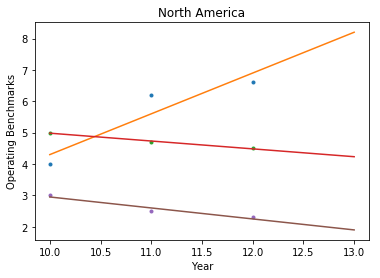

In [4]:
#grab the slope and intercepts for NA 
na_sq_slope, na_sq_intercept = getSlope(x,y_na_sq)
na_rebate_slope,na_rebate_intercept = getSlope(x,y_na_rebate)
na_delivery_slope, na_delivery_intercept = getSlope(x,y_na_delivery)

#set the y theoretical for NA
sq_y_theor = getYTheor(na_sq_slope, x_theor, na_sq_intercept)
rebate_y_theor = getYTheor(na_rebate_slope,x_theor,na_rebate_intercept)
delivery_y_theor = getYTheor(na_delivery_slope, x_theor, na_delivery_intercept)

#print the predicted price
print(printPrediction(na_sq_slope, na_sq_intercept, 'S/Q'))
print(printPrediction(na_rebate_slope, na_rebate_intercept, 'Manufacturer Rebate'))
print(printPrediction(na_delivery_slope, na_delivery_intercept, 'Delivery Time'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_na_sq,marker='.', linestyle='none')
_ = plt.plot(x_theor,sq_y_theor)
_ = plt.plot(x,y_na_rebate,marker='.', linestyle='none')
_ = plt.plot(x_theor,rebate_y_theor)
_ = plt.plot(x,y_na_delivery,marker='.', linestyle='none')
_ = plt.plot(x_theor,delivery_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Operating Benchmarks')
plt.title('North America')
plt.show()

### Europe Africa S/Q, Manufacturer Rebate, and Delivery Time
* S/Q: Standards and Quality between 0 and 10
* Manufacturer Rebate: 3 to 15 dollars per pair
* Delivery Time: 1 to 4 weeks

Year 13 S/Q predicted: 8.0333
Year 13 Manufacturer Rebate predicted: 4.2
Year 13 Delivery Time predicted: 2.2333


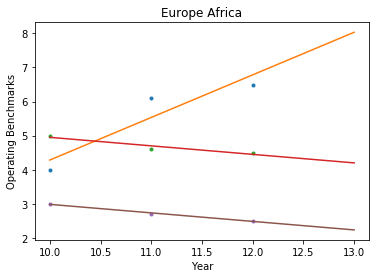

In [5]:
#grab the slope and intercepts for EU 
eu_sq_slope, eu_sq_intercept = getSlope(x,y_eu_sq)
eu_rebate_slope,eu_rebate_intercept = getSlope(x,y_eu_rebate)
eu_delivery_slope, eu_delivery_intercept = getSlope(x,y_eu_delivery)

#set the y theoretical for EU
sq_y_theor = getYTheor(eu_sq_slope, x_theor, eu_sq_intercept)
rebate_y_theor = getYTheor(eu_rebate_slope,x_theor,eu_rebate_intercept)
delivery_y_theor = getYTheor(eu_delivery_slope, x_theor, eu_delivery_intercept)

#print the predicted price
print(printPrediction(eu_sq_slope, eu_sq_intercept, 'S/Q'))
print(printPrediction(eu_rebate_slope, eu_rebate_intercept, 'Manufacturer Rebate'))
print(printPrediction(eu_delivery_slope, eu_delivery_intercept, 'Delivery Time'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_eu_sq,marker='.', linestyle='none')
_ = plt.plot(x_theor,sq_y_theor)
_ = plt.plot(x,y_eu_rebate,marker='.', linestyle='none')
_ = plt.plot(x_theor,rebate_y_theor)
_ = plt.plot(x,y_eu_delivery,marker='.', linestyle='none')
_ = plt.plot(x_theor,delivery_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Operating Benchmarks')
plt.title('Europe Africa')
plt.show()

### Asia Pacific S/Q, Manufacturer Rebate, and Delivery Time
* S/Q: Standards and Quality between 0 and 10
* Manufacturer Rebate: 3 to 15 dollars per pair
* Delivery Time: 1 to 4 weeks

Year 13 S/Q predicted: 7.8667
Year 13 Manufacturer Rebate predicted: 4.9666999999999994
Year 13 Delivery Time predicted: 2.2333


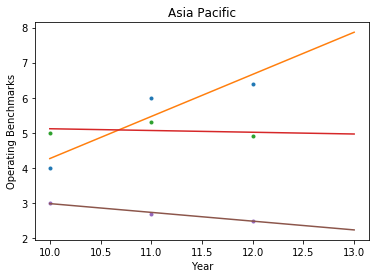

In [6]:
#grab the slope and intercepts for AP 
ap_sq_slope, ap_sq_intercept = getSlope(x,y_ap_sq)
ap_rebate_slope,ap_rebate_intercept = getSlope(x,y_ap_rebate)
ap_delivery_slope, ap_delivery_intercept = getSlope(x,y_ap_delivery)

#set the y theoretical for AP
sq_y_theor = getYTheor(ap_sq_slope, x_theor, ap_sq_intercept)
rebate_y_theor = getYTheor(ap_rebate_slope,x_theor,ap_rebate_intercept)
delivery_y_theor = getYTheor(ap_delivery_slope, x_theor, ap_delivery_intercept)

#print the predicted price
print(printPrediction(ap_sq_slope, ap_sq_intercept, 'S/Q'))
print(printPrediction(ap_rebate_slope, ap_rebate_intercept, 'Manufacturer Rebate'))
print(printPrediction(ap_delivery_slope, ap_delivery_intercept, 'Delivery Time'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_ap_sq,marker='.', linestyle='none')
_ = plt.plot(x_theor,sq_y_theor)
_ = plt.plot(x,y_ap_rebate,marker='.', linestyle='none')
_ = plt.plot(x_theor,rebate_y_theor)
_ = plt.plot(x,y_ap_delivery,marker='.', linestyle='none')
_ = plt.plot(x_theor,delivery_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Operating Benchmarks')
plt.title('Asia Pacific')
plt.show()

### Latin America S/Q, Manufacturer Rebate, and Delivery Time
* S/Q: Standards and Quality between 0 and 10
* Manufacturer Rebate: 3 to 15 dollars per pair
* Delivery Time: 1 to 4 weeks

Year 13 S/Q predicted: 7.6000000000000005
Year 13 Manufacturer Rebate predicted: 4.7
Year 13 Delivery Time predicted: 2.2667


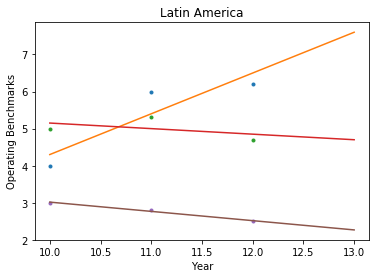

In [7]:
#grab the slope and intercepts for LA 
la_sq_slope, la_sq_intercept = getSlope(x,y_la_sq)
la_rebate_slope,la_rebate_intercept = getSlope(x,y_la_rebate)
la_delivery_slope, la_delivery_intercept = getSlope(x,y_la_delivery)

#set the y theoretical for LA
sq_y_theor = getYTheor(la_sq_slope, x_theor, la_sq_intercept)
rebate_y_theor = getYTheor(la_rebate_slope,x_theor,la_rebate_intercept)
delivery_y_theor = getYTheor(la_delivery_slope, x_theor,la_delivery_intercept)

#print the predicted price
print(printPrediction(la_sq_slope, la_sq_intercept, 'S/Q'))
print(printPrediction(la_rebate_slope, la_rebate_intercept, 'Manufacturer Rebate'))
print(printPrediction(la_delivery_slope, la_delivery_intercept, 'Delivery Time'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_la_sq,marker='.', linestyle='none')
_ = plt.plot(x_theor,sq_y_theor)
_ = plt.plot(x,y_la_rebate,marker='.', linestyle='none')
_ = plt.plot(x_theor,rebate_y_theor)
_ = plt.plot(x,y_la_delivery,marker='.', linestyle='none')
_ = plt.plot(x_theor,delivery_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Operating Benchmarks')
plt.title('Latin America')
plt.show()

### Free Internet Shipping Offer
* Predicting the Industry Average for Free Internet Shipping to Customers

Integer | Meaning | Notes
--- | --- | ---|
0 | None | No firm is offering free shipping
1 | Few | A few firms offer free shipping
2 | Some | Some firms offer free shipping
3 | Most | Most firms offer free shipping
4 | All | All firms offer free shipping

Year 13 North Americal Shipping predicted: 1.6666999999999996
Year 13 Europe Africa Shipping predicted: 1.6666999999999996
Year 13 Asia Pacific Shipping predicted: 1.6666999999999996
Year 13 Latin America Shipping predicted: 1.3333000000000004


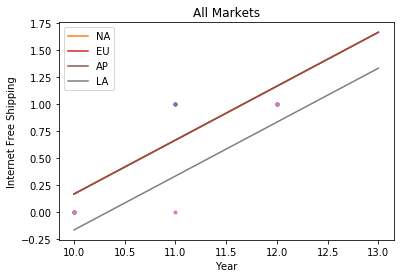

In [8]:
#grab the slope and intercepts for all markets
na_shipping_slope, na_shipping_intercept = getSlope(x,y_na_shipping)
eu_shipping_slope, eu_shipping_intercept = getSlope(x,y_eu_shipping)
ap_shipping_slope, ap_shipping_intercept = getSlope(x,y_ap_shipping)
la_shipping_slope, la_shipping_intercept = getSlope(x,y_la_shipping)

#set the y theoretical for all markets
naShipping_y_theor = getYTheor(na_shipping_slope, x_theor, na_shipping_intercept)
euShipping_y_theor = getYTheor(eu_shipping_slope, x_theor, eu_shipping_intercept)
apShipping_y_theor = getYTheor(ap_shipping_slope, x_theor, ap_shipping_intercept)
laShipping_y_theor = getYTheor(la_shipping_slope, x_theor, la_shipping_intercept)

#print the predicted price
print(printPrediction(na_shipping_slope, na_shipping_intercept, 'North Americal Shipping'))
print(printPrediction(eu_shipping_slope, eu_shipping_intercept, 'Europe Africa Shipping'))
print(printPrediction(ap_shipping_slope, ap_shipping_intercept, 'Asia Pacific Shipping'))
print(printPrediction(la_shipping_slope, la_shipping_intercept, 'Latin America Shipping'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_na_shipping,marker='.', linestyle='none')
_ = plt.plot(x_theor,naShipping_y_theor, label = 'NA')
_ = plt.plot(x,y_eu_shipping,marker='.', linestyle='none')
_ = plt.plot(x_theor,euShipping_y_theor, label='EU')
_ = plt.plot(x,y_ap_shipping,marker='.', linestyle='none')
_ = plt.plot(x_theor,apShipping_y_theor, label='AP')
_ = plt.plot(x,y_la_shipping,marker='.', linestyle='none')
_ = plt.plot(x_theor,laShipping_y_theor, label='LA')

#label the axes
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Internet Free Shipping')
plt.title('All Markets')
plt.show()

### Model Availability: All Segments
* Number of Models: 50 to 500 models

Year 13 North Americal Models predicted: 395.3333
Year 13 Europe Africa Models predicted: 375.3333
Year 13 Asia Pacific Models predicted: 395.0
Year 13 Latin America Models predicted: 365.6667


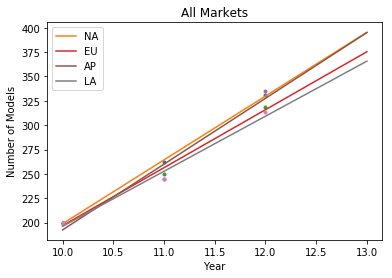

In [9]:
#grab the slope and intercepts for all markets
na_models_slope, na_models_intercept = getSlope(x,y_na_models)
eu_models_slope, eu_models_intercept = getSlope(x,y_eu_models)
ap_models_slope, ap_models_intercept = getSlope(x,y_ap_models)
la_models_slope, la_models_intercept = getSlope(x,y_la_models)

#set the y theoretical for all markets
naModels_y_theor = getYTheor(na_models_slope, x_theor, na_models_intercept)
euModels_y_theor = getYTheor(eu_models_slope, x_theor, eu_models_intercept)
apModels_y_theor = getYTheor(ap_models_slope, x_theor, ap_models_intercept)
laModels_y_theor = getYTheor(la_models_slope, x_theor, la_models_intercept)

#print the predicted price
print(printPrediction(na_models_slope, na_models_intercept, 'North Americal Models'))
print(printPrediction(eu_models_slope, eu_models_intercept, 'Europe Africa Models'))
print(printPrediction(ap_models_slope, ap_models_intercept, 'Asia Pacific Models'))
print(printPrediction(la_models_slope, la_models_intercept, 'Latin America Models'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_na_models,marker='.', linestyle='none')
_ = plt.plot(x_theor,naModels_y_theor, label = 'NA')
_ = plt.plot(x,y_eu_models,marker='.', linestyle='none')
_ = plt.plot(x_theor,euModels_y_theor, label='EU')
_ = plt.plot(x,y_ap_models,marker='.', linestyle='none')
_ = plt.plot(x_theor,apModels_y_theor, label='AP')
_ = plt.plot(x,y_la_models,marker='.', linestyle='none')
_ = plt.plot(x_theor,laModels_y_theor, label='LA')

#label the axes
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.title('All Markets')
plt.show()